In [ ]:
!pip install torch

ERROR: Operation cancelled by user


Generating map 1/100


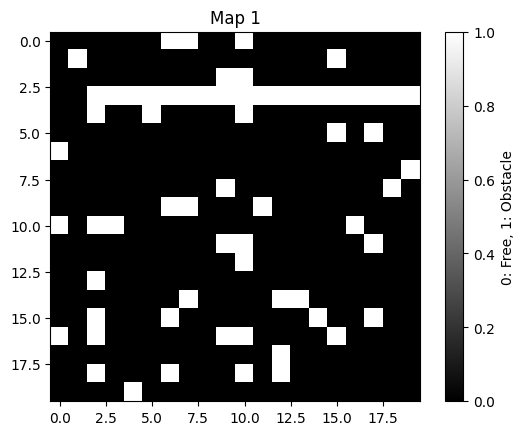

Generating map 2/100


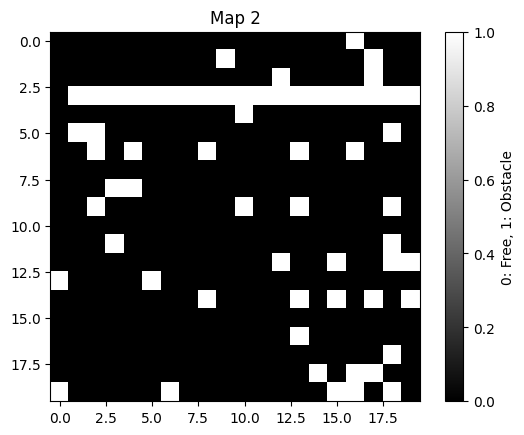

Generating map 3/100
Crash occurred at position [18.  8.]


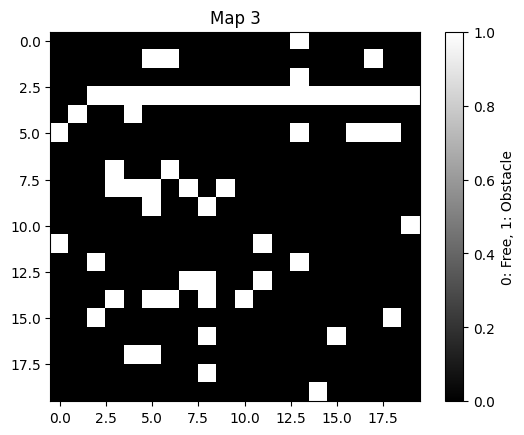

Generating map 4/100


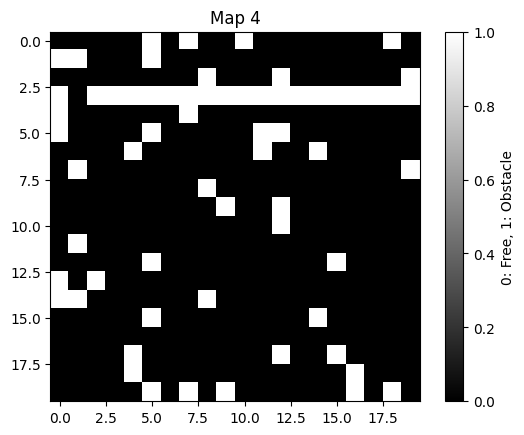

Generating map 5/100
Crash occurred at position [3. 7.]


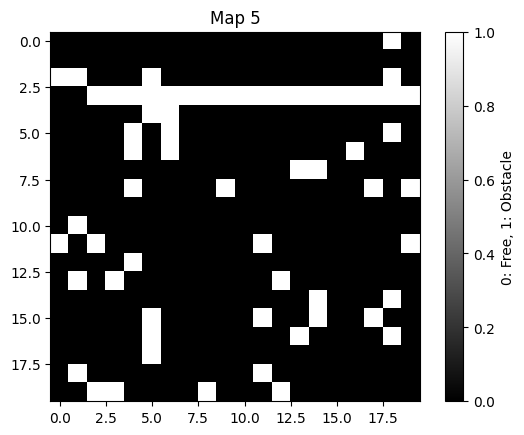

Generating map 6/100


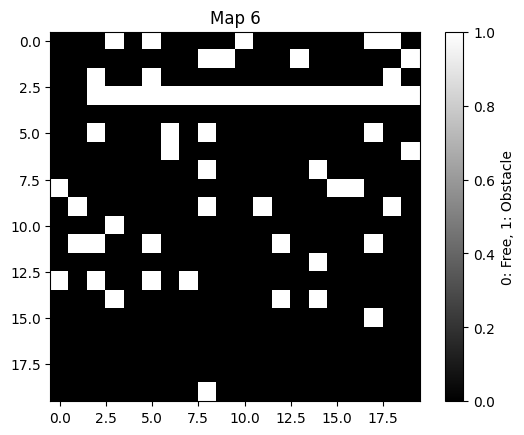

Generating map 7/100


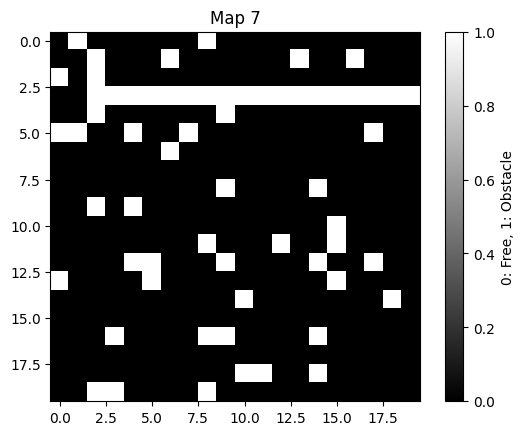

Generating map 8/100


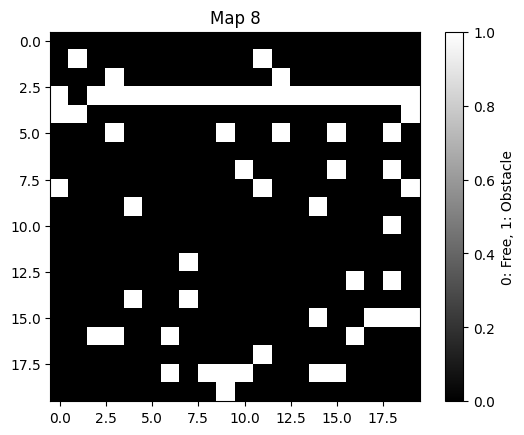

Generating map 9/100
Crash occurred at position [16.  6.]


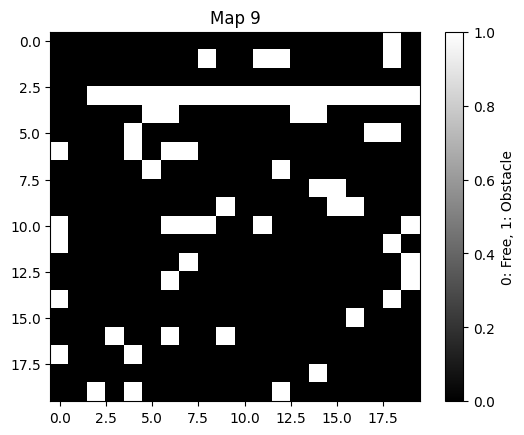

Generating map 10/100


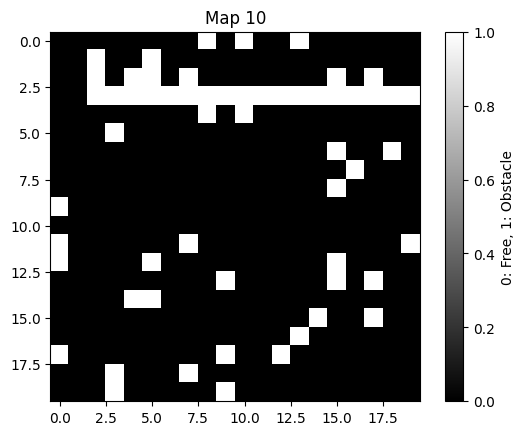

Generating map 11/100


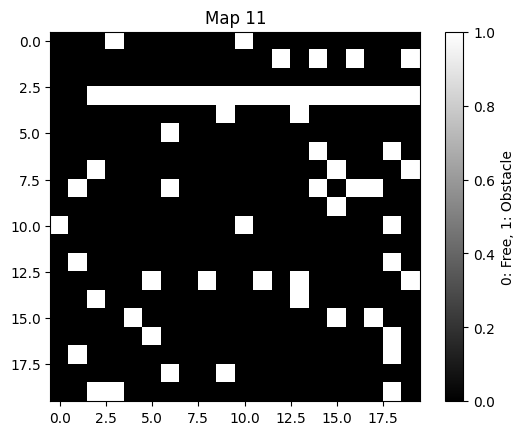

Generating map 12/100


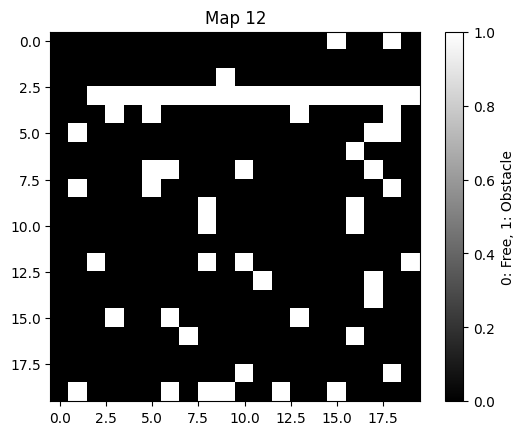

Generating map 13/100
Crash occurred at position [ 3. 14.]


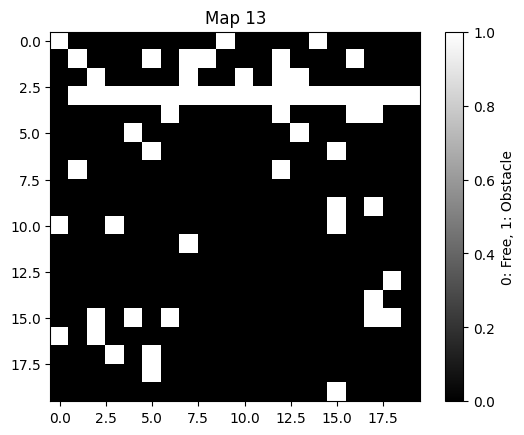

Generating map 14/100


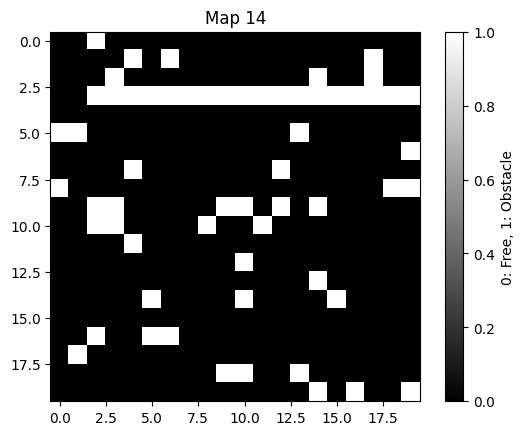

Generating map 15/100


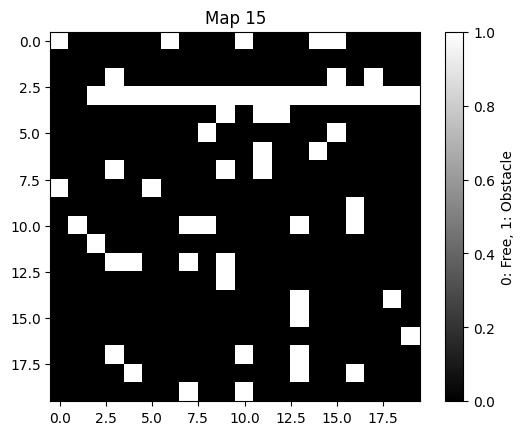

Generating map 16/100


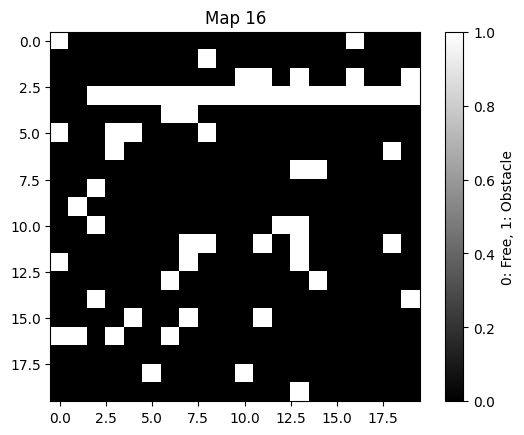

Generating map 17/100


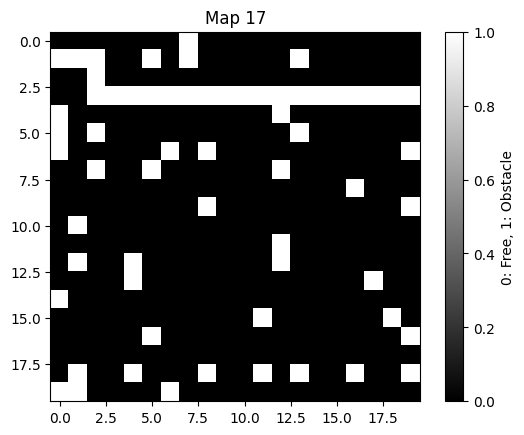

Generating map 18/100


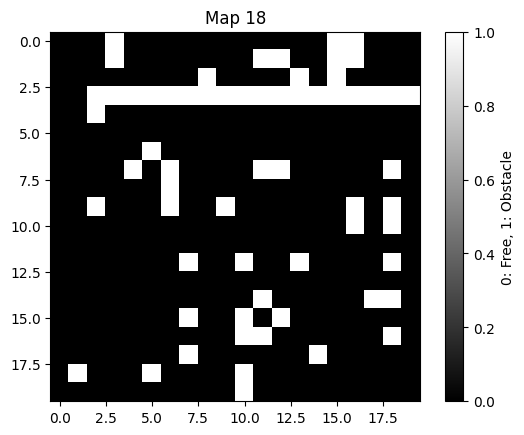

Generating map 19/100
Crash occurred at position [19. 19.]


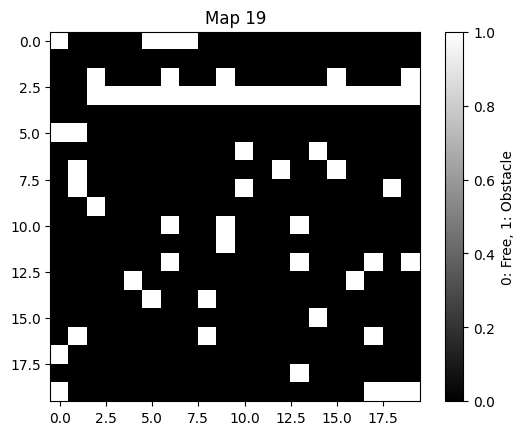

Generating map 20/100
Crash occurred at position [12.  1.]


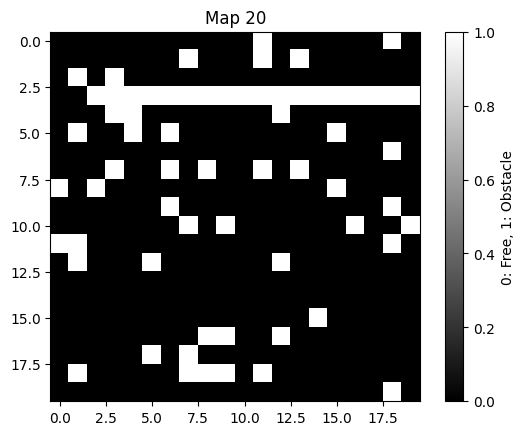

Generating map 21/100


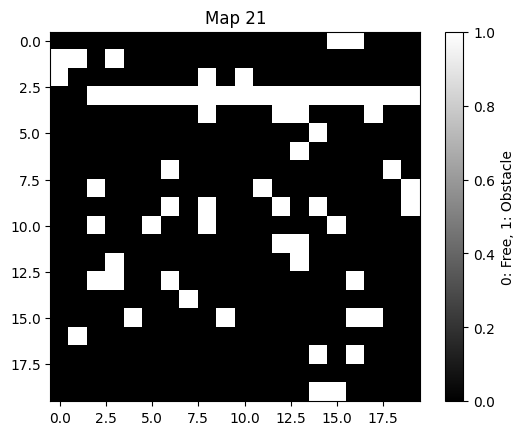

Generating map 22/100


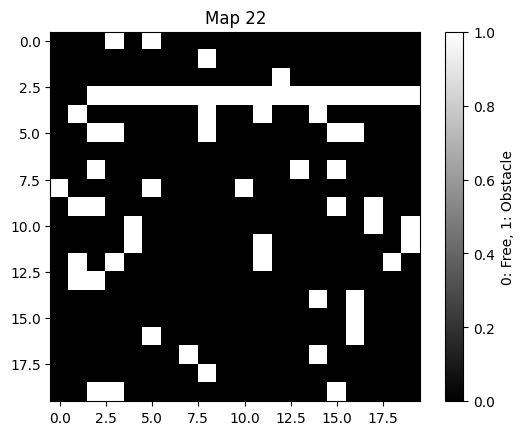

Generating map 23/100


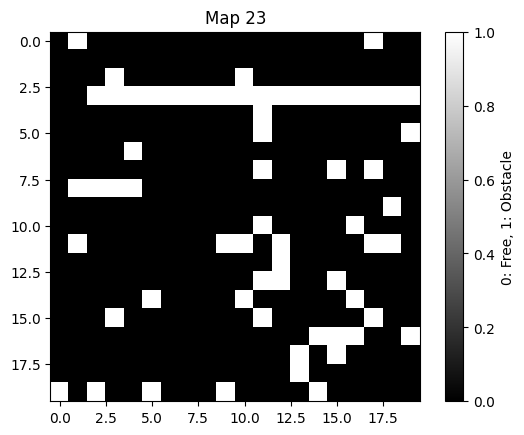

Generating map 24/100


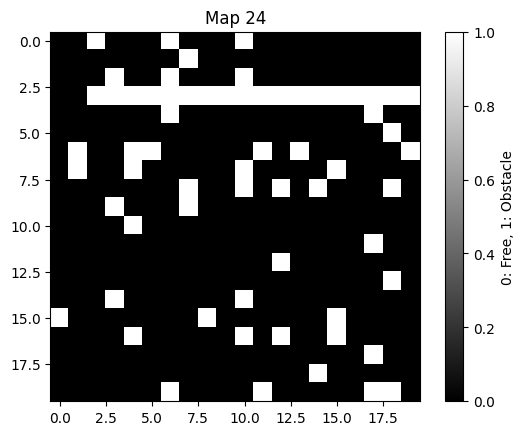

Generating map 25/100


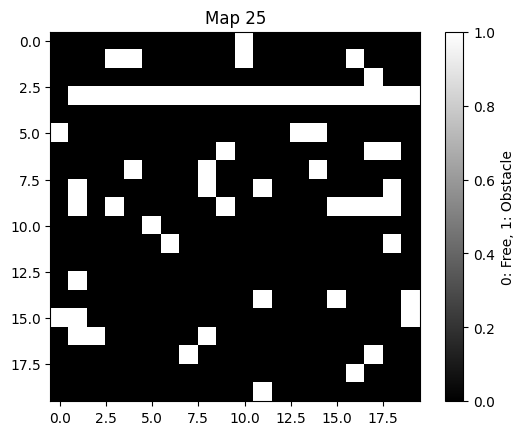

Generating map 26/100


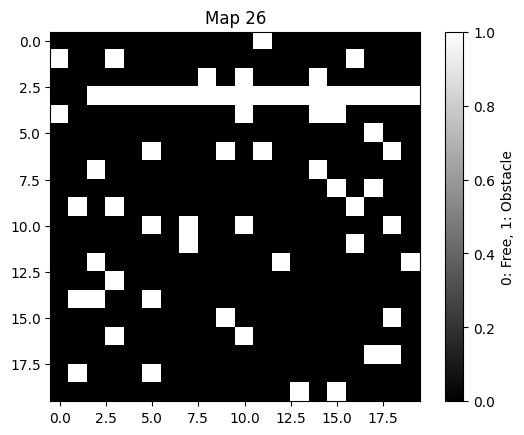

Generating map 27/100


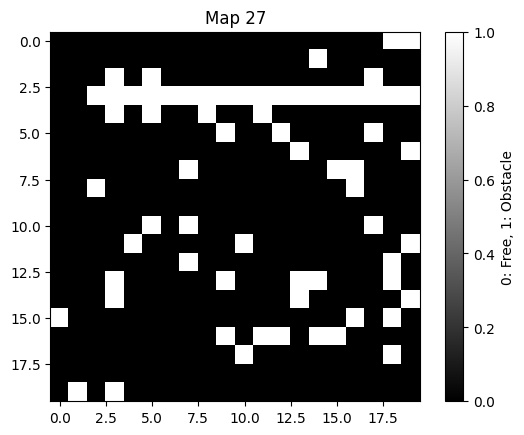

Generating map 28/100


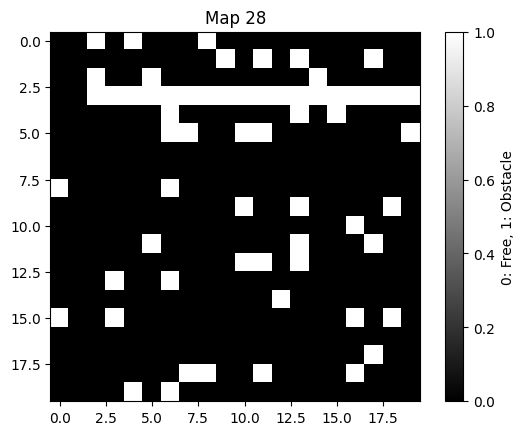

Generating map 29/100


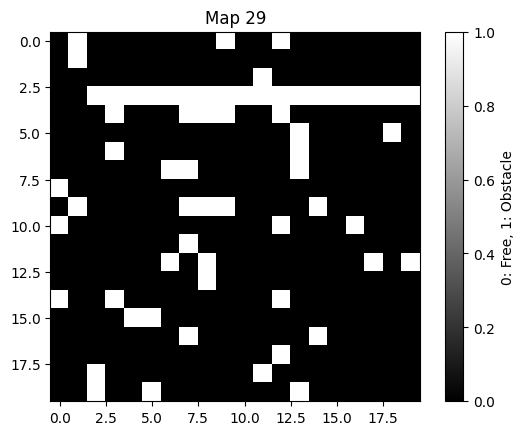

Generating map 30/100


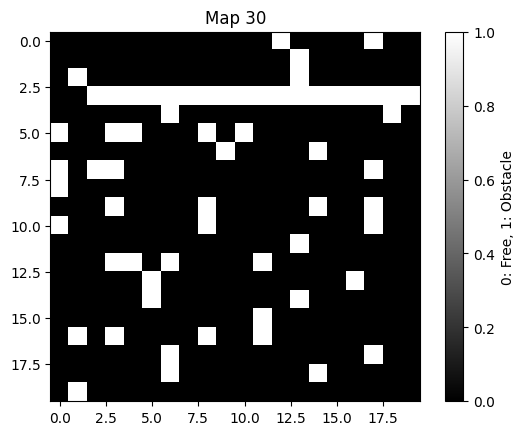

Generating map 31/100


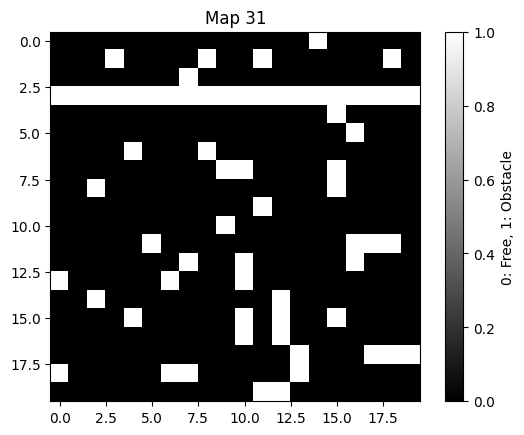

Generating map 32/100


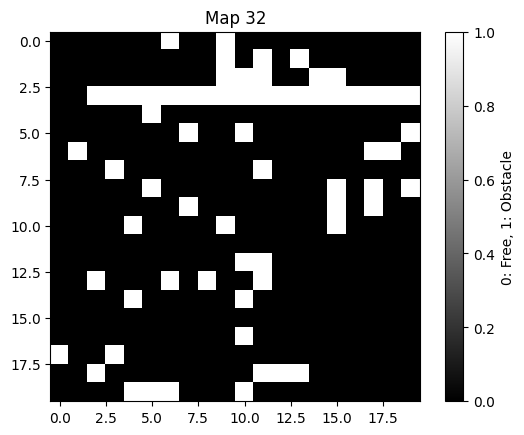

Generating map 33/100
Crash occurred at position [4. 3.]


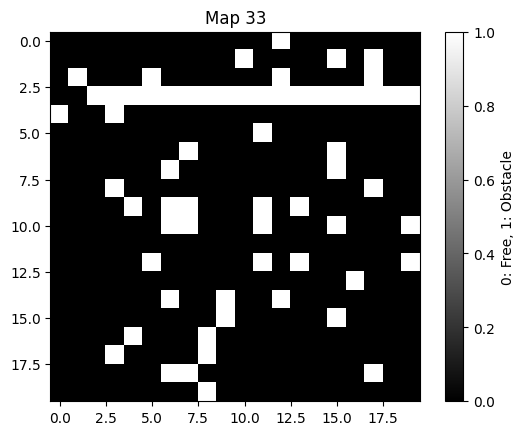

Generating map 34/100


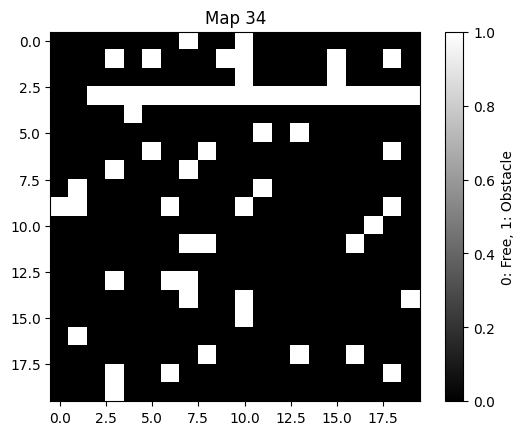

Generating map 35/100


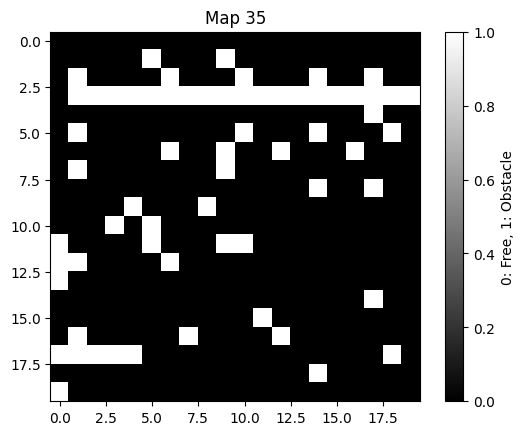

Generating map 36/100


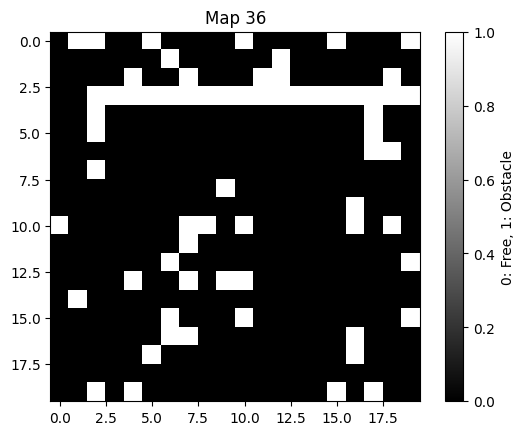

Generating map 37/100


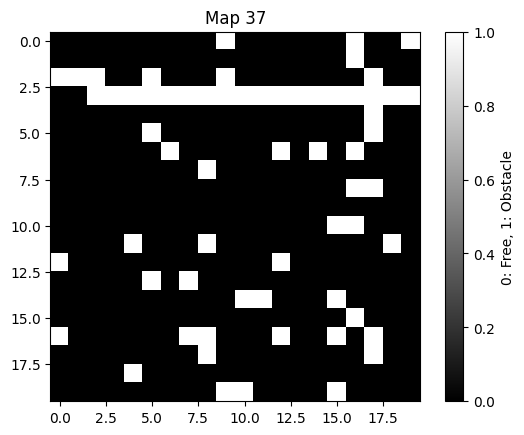

Generating map 38/100


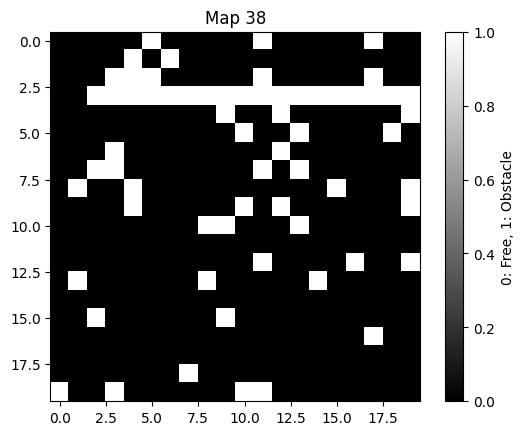

Generating map 39/100


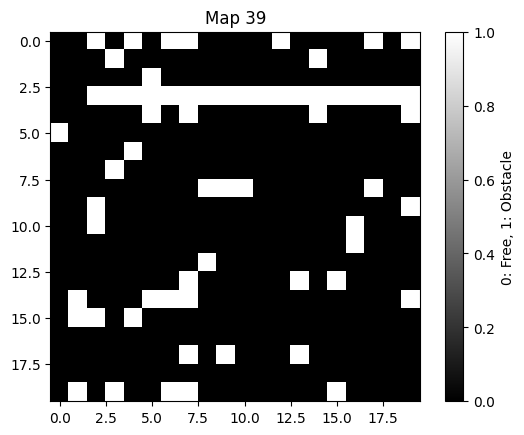

Generating map 40/100


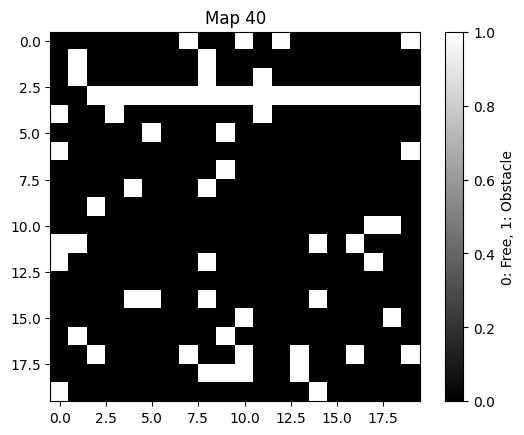

Generating map 41/100


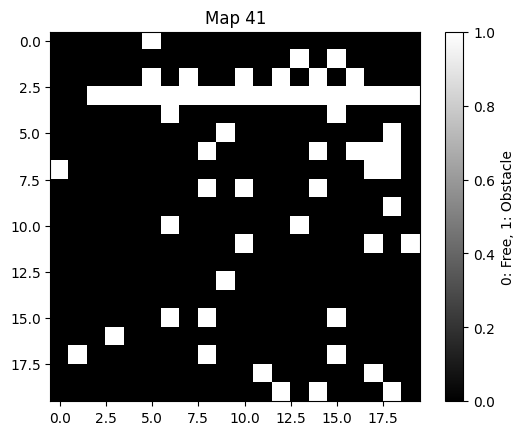

Generating map 42/100


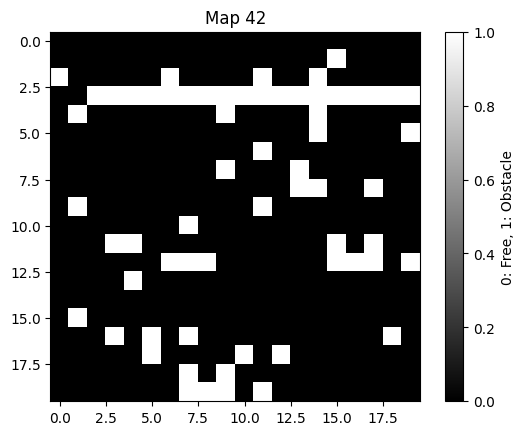

Generating map 43/100


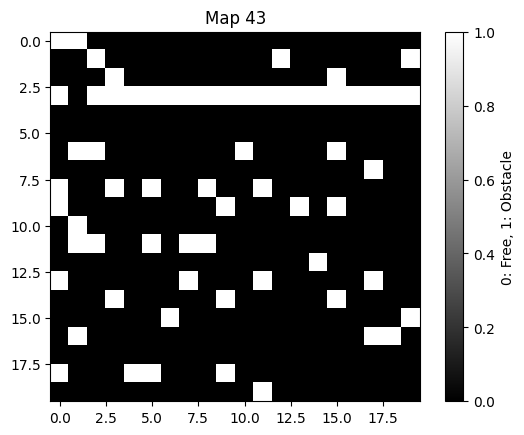

Generating map 44/100


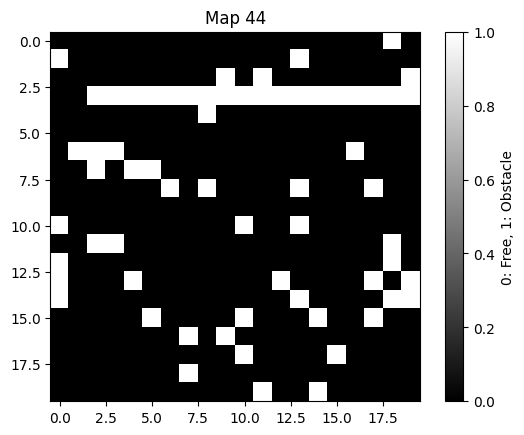

Generating map 45/100


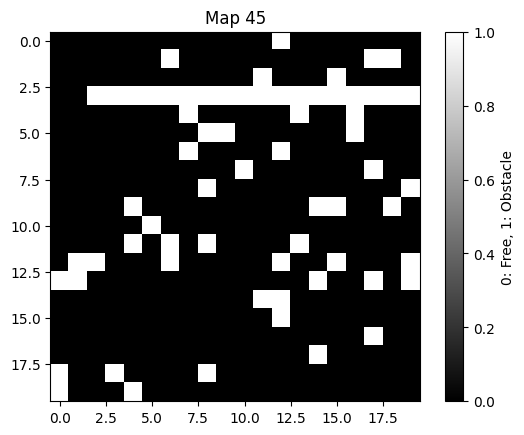

Generating map 46/100


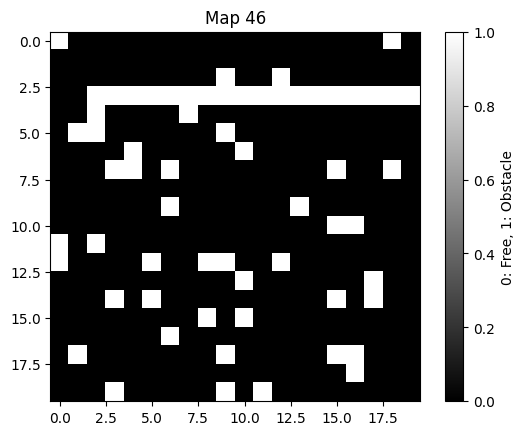

Generating map 47/100


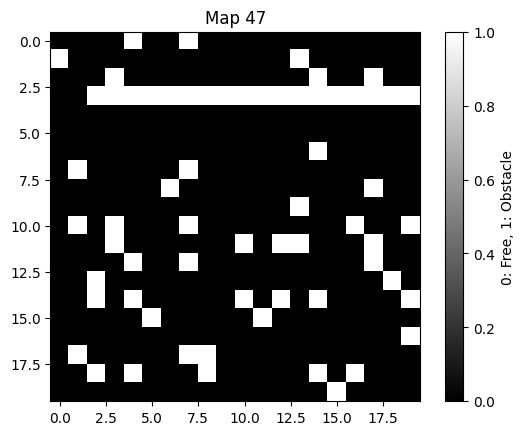

Generating map 48/100


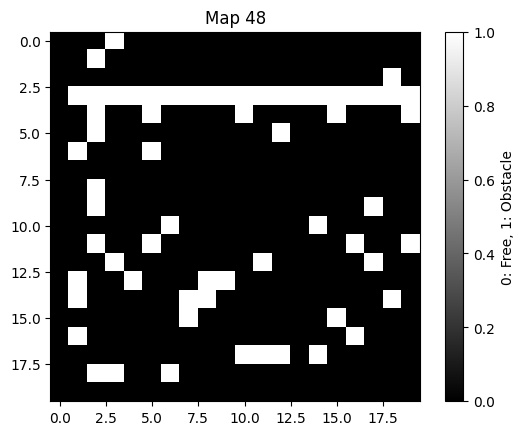

Generating map 49/100


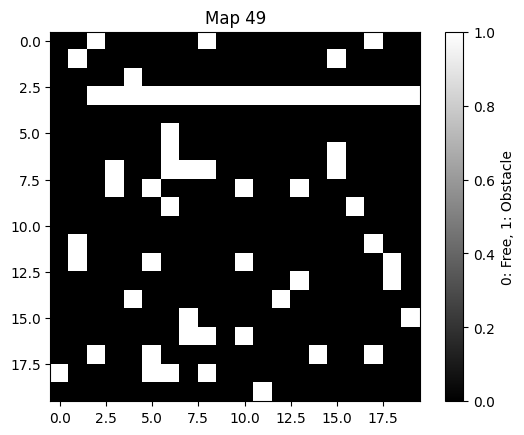

Generating map 50/100
Crash occurred at position [ 3. 10.]


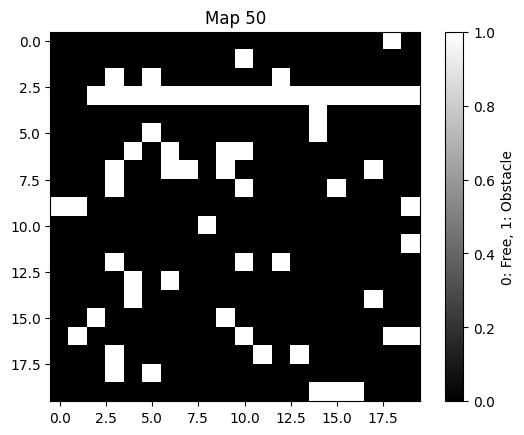

Generating map 51/100


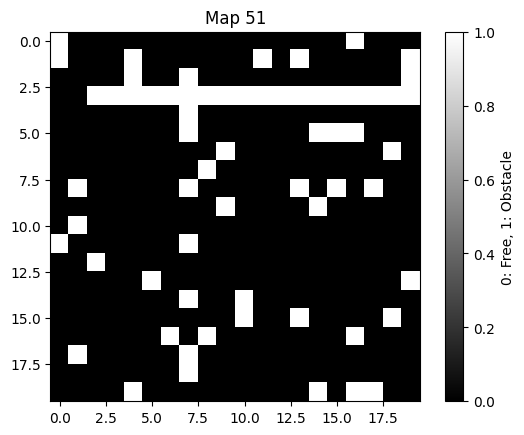

Generating map 52/100


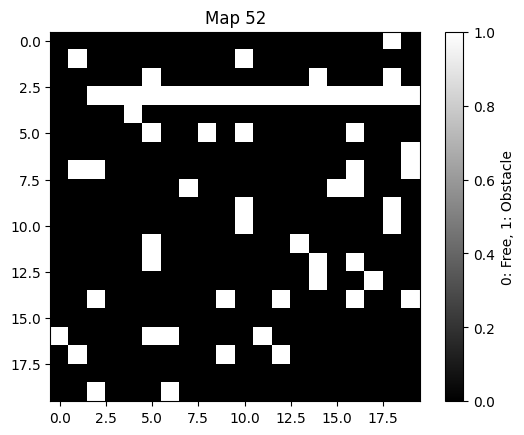

Generating map 53/100


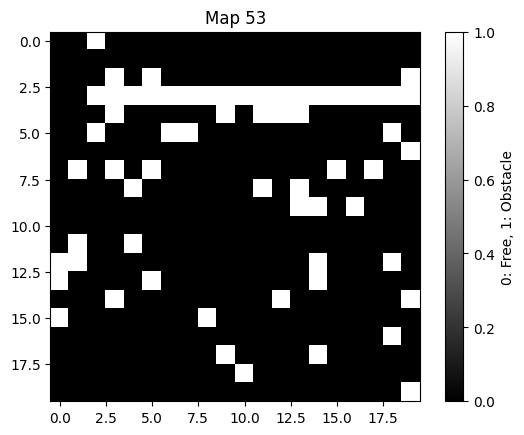

Generating map 54/100


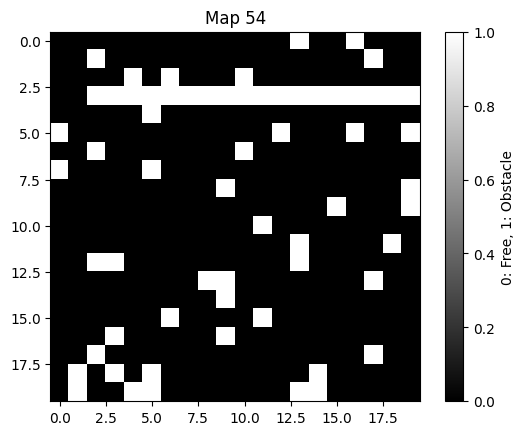

Generating map 55/100


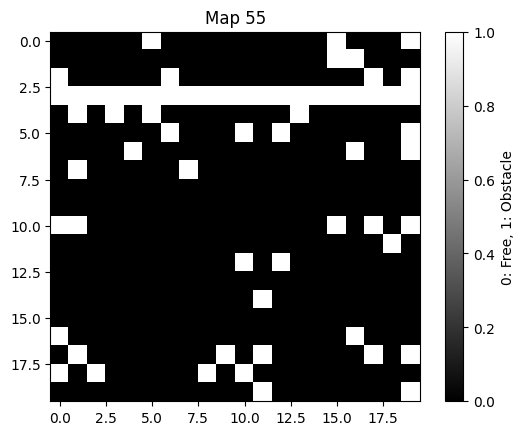

Generating map 56/100


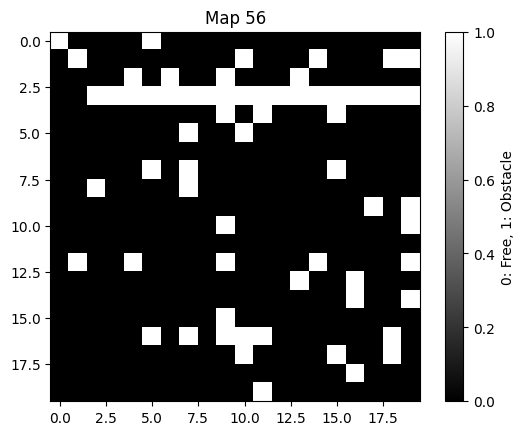

Generating map 57/100


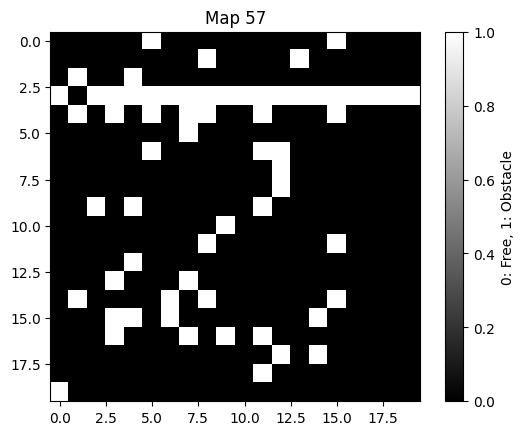

Generating map 58/100


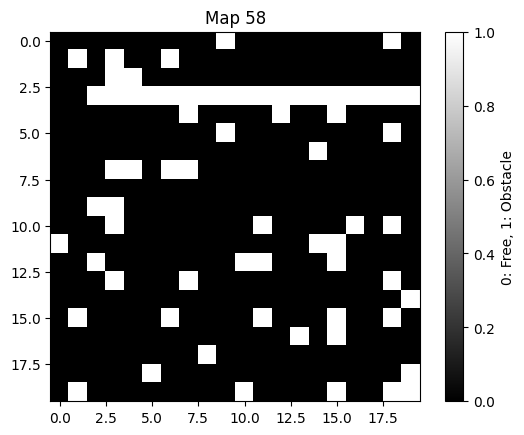

Generating map 59/100
Crash occurred at position [3. 7.]


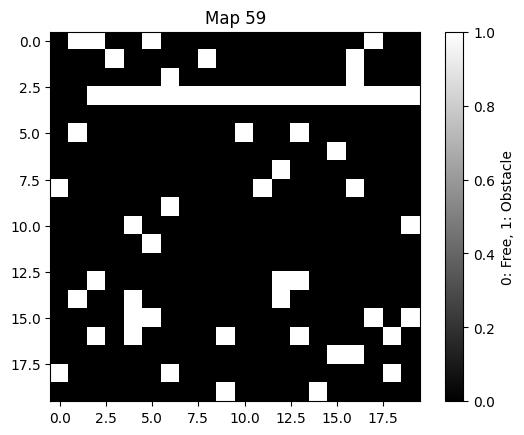

Generating map 60/100


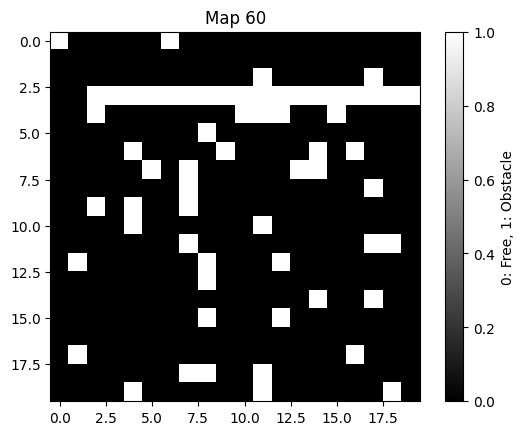

Generating map 61/100
Crash occurred at position [11. 17.]


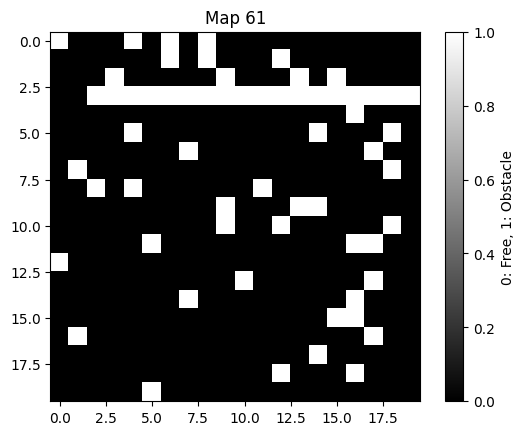

Generating map 62/100


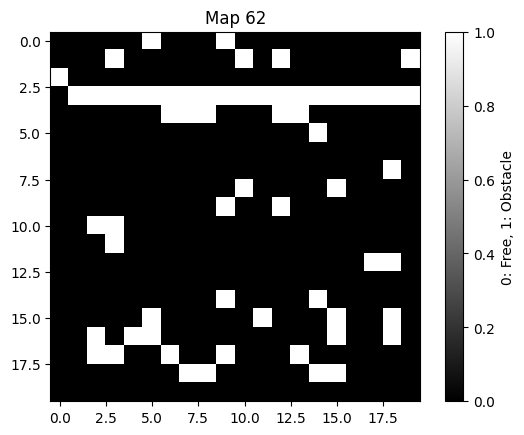

Generating map 63/100
Crash occurred at position [10. 15.]


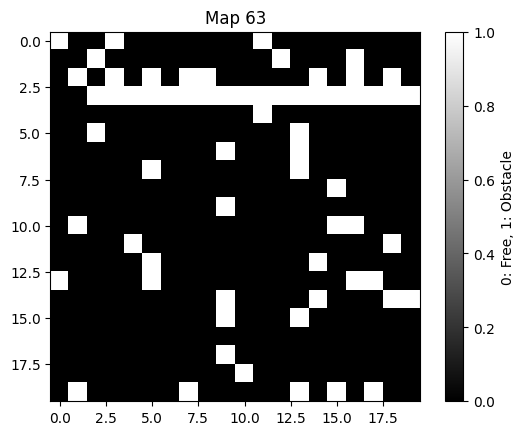

Generating map 64/100


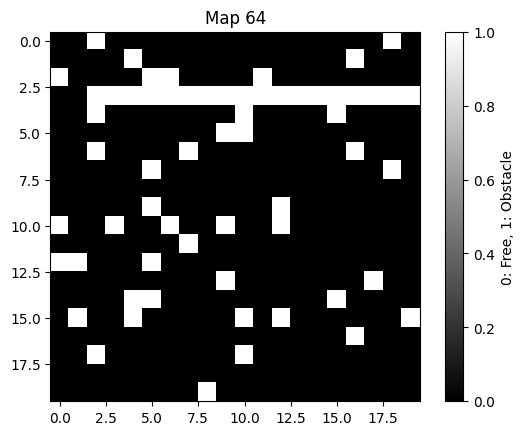

Generating map 65/100


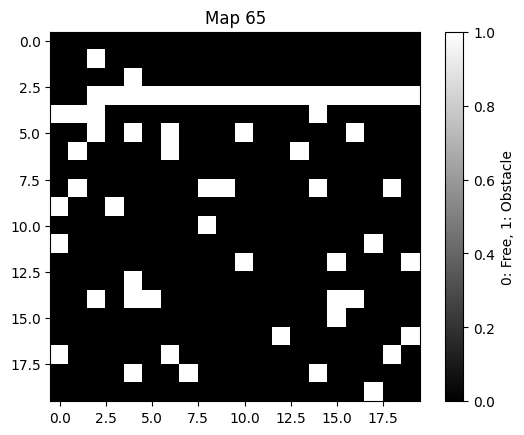

Generating map 66/100


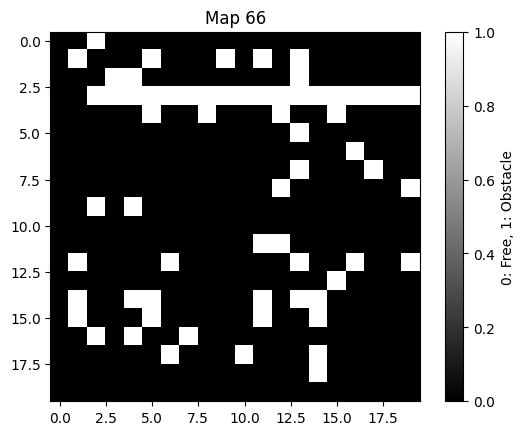

Generating map 67/100


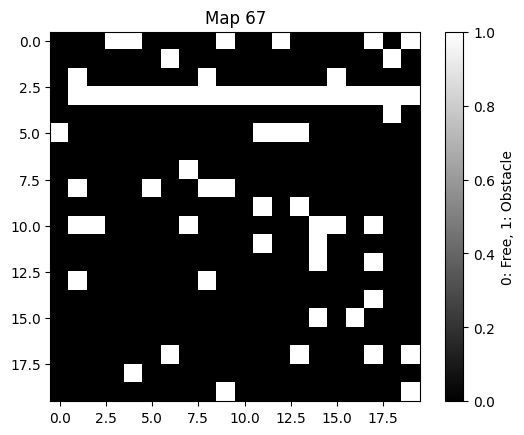

Generating map 68/100
Crash occurred at position [ 3. 11.]


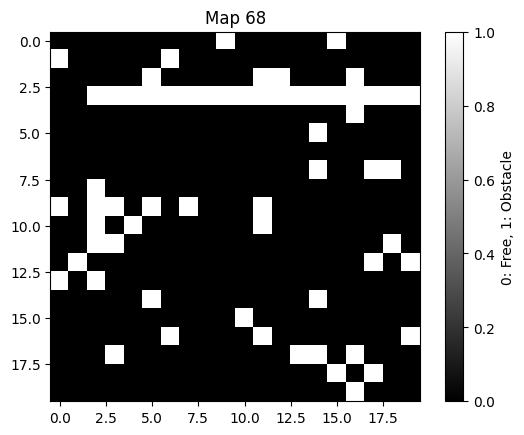

Generating map 69/100


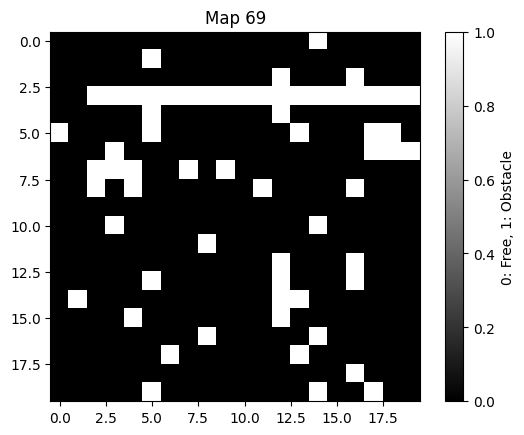

Generating map 70/100
Crash occurred at position [11.  8.]


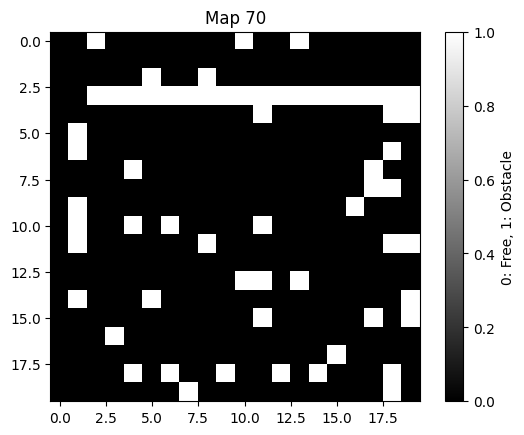

Generating map 71/100


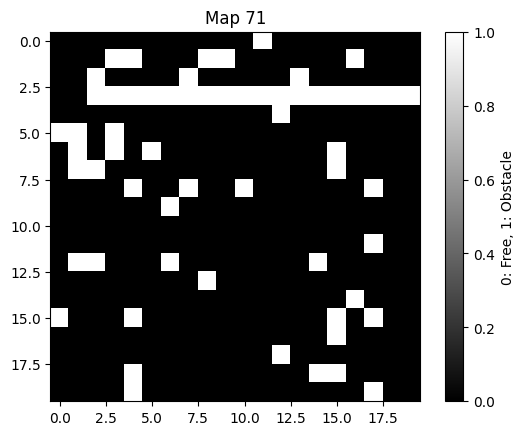

Generating map 72/100


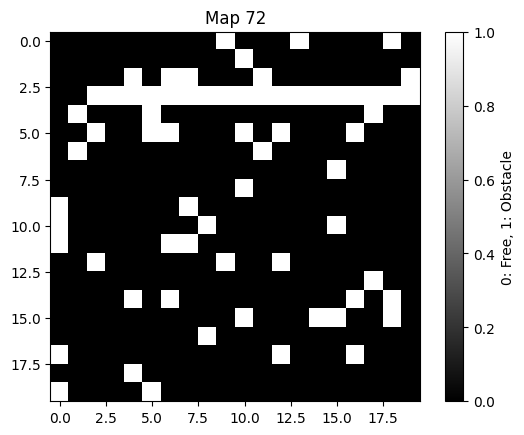

Generating map 73/100


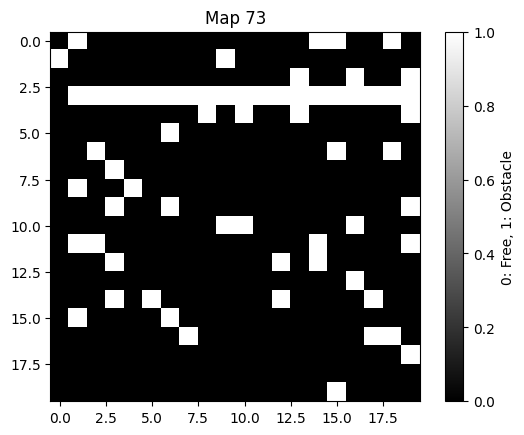

Generating map 74/100


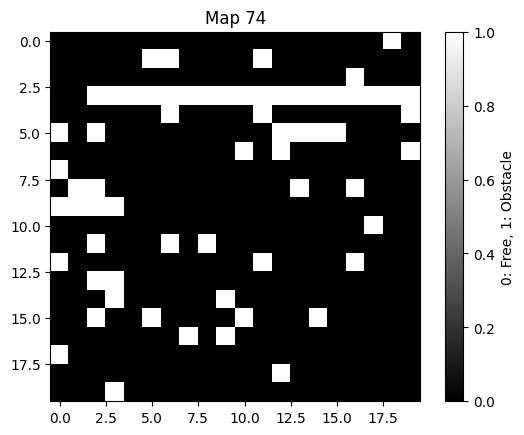

Generating map 75/100


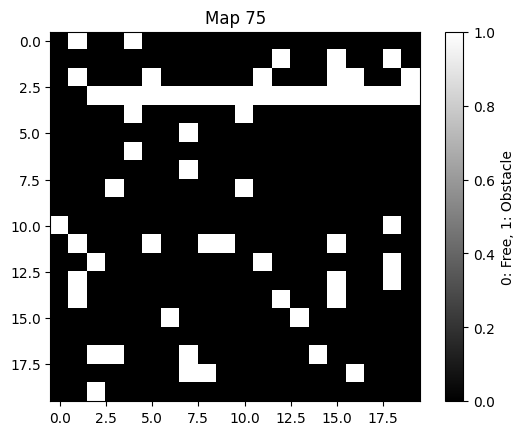

Generating map 76/100


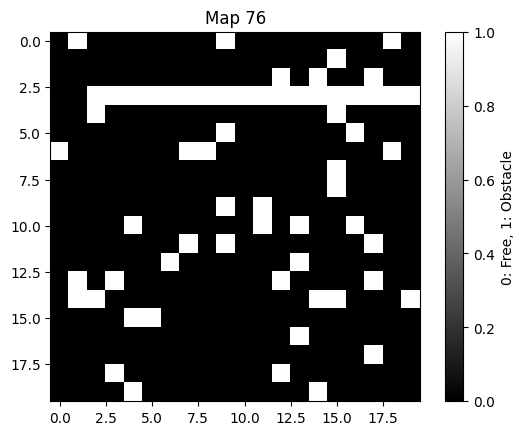

Generating map 77/100


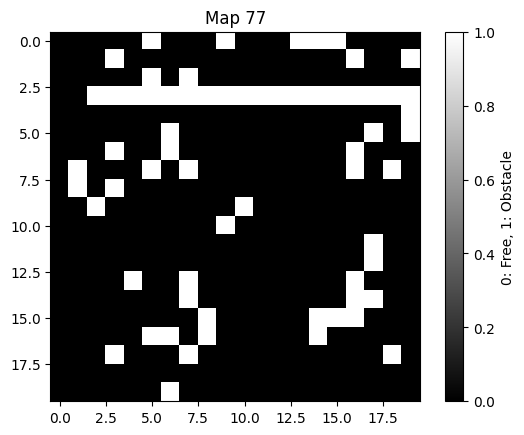

Generating map 78/100


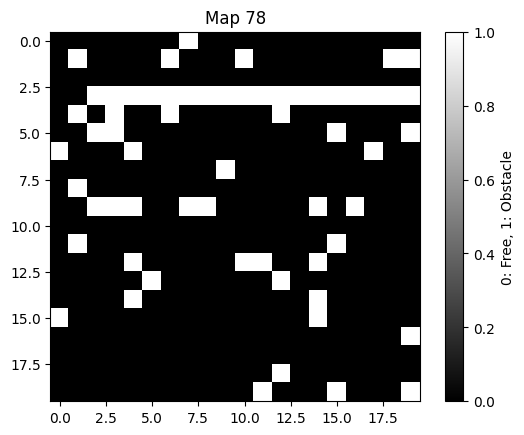

Generating map 79/100


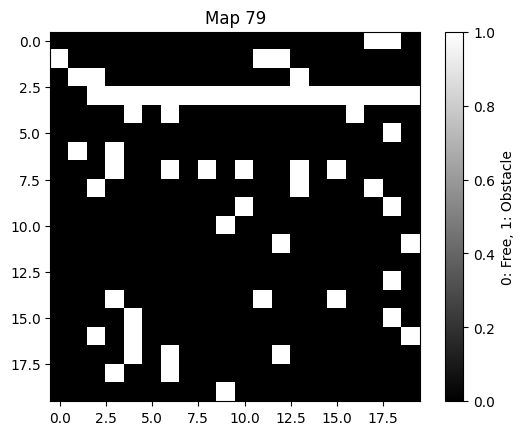

Generating map 80/100


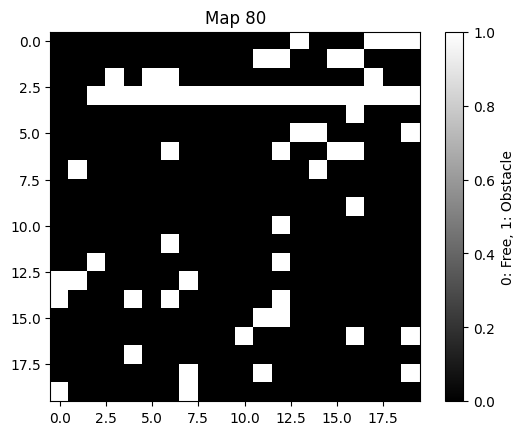

Generating map 81/100


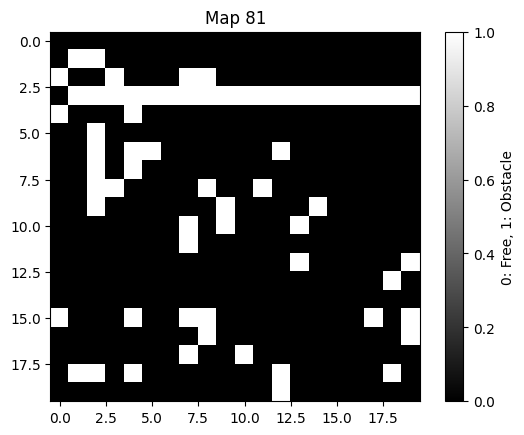

Generating map 82/100


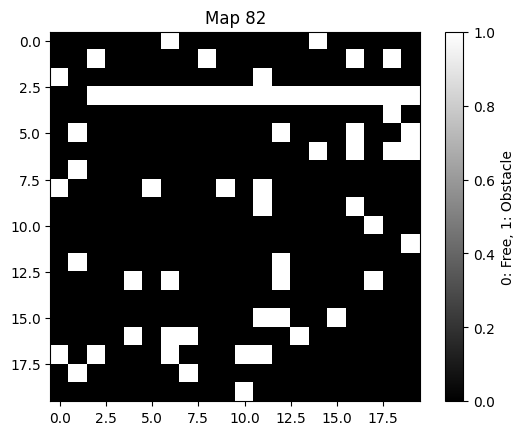

Generating map 83/100


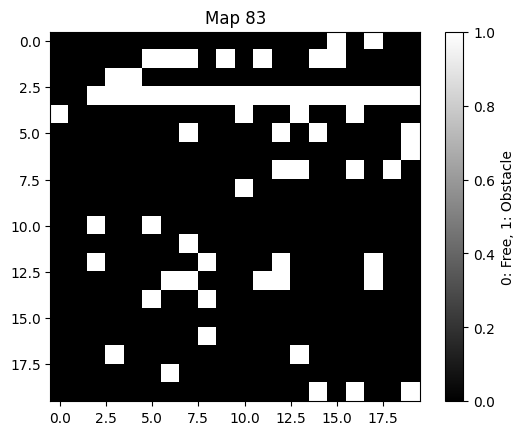

Generating map 84/100


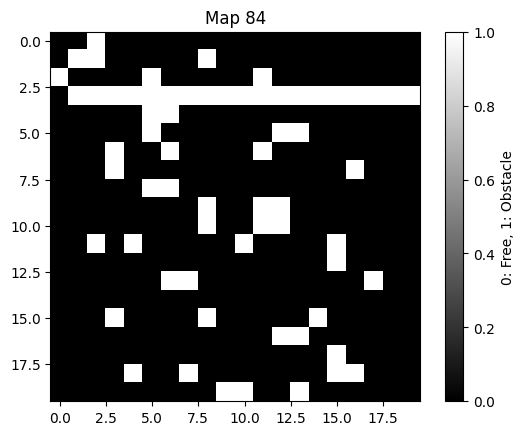

Generating map 85/100
Crash occurred at position [2. 4.]


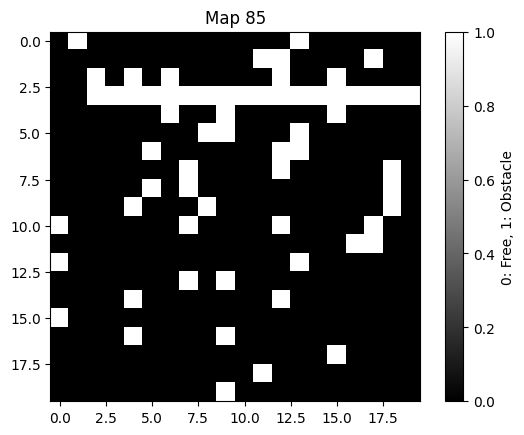

Generating map 86/100


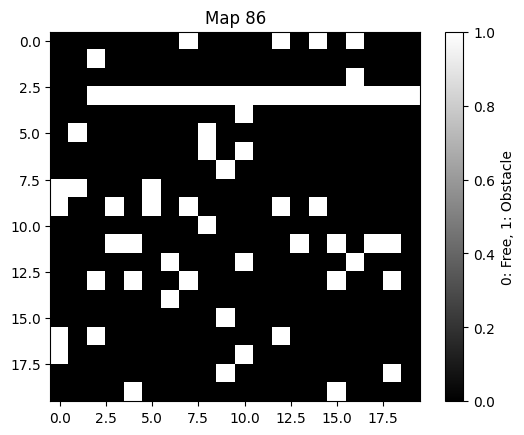

Generating map 87/100


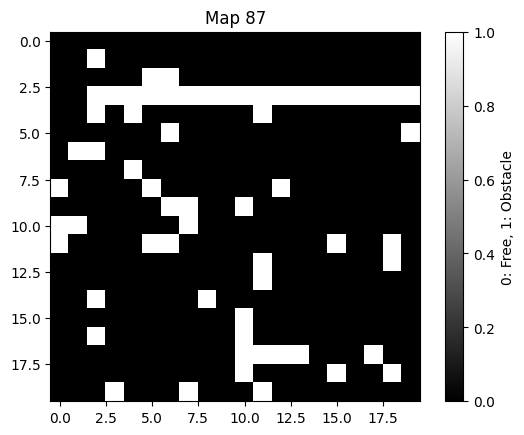

Generating map 88/100


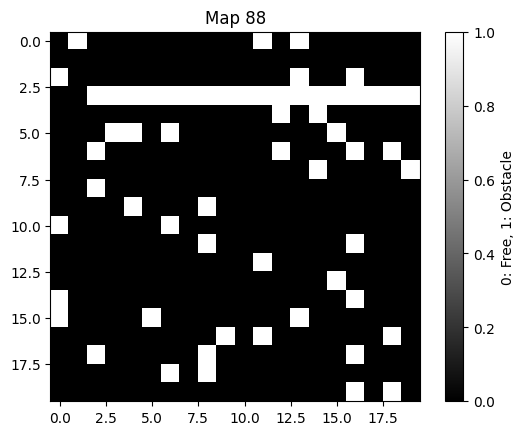

Generating map 89/100


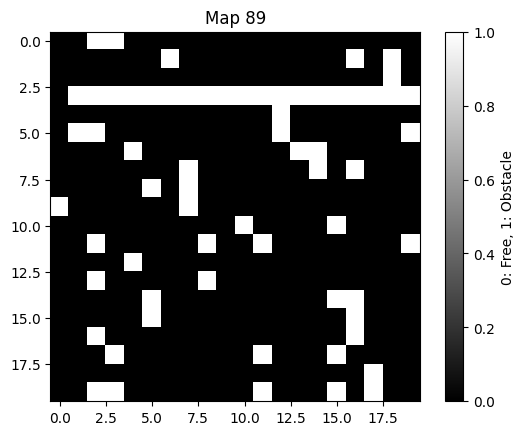

Generating map 90/100
Crash occurred at position [ 4. 13.]


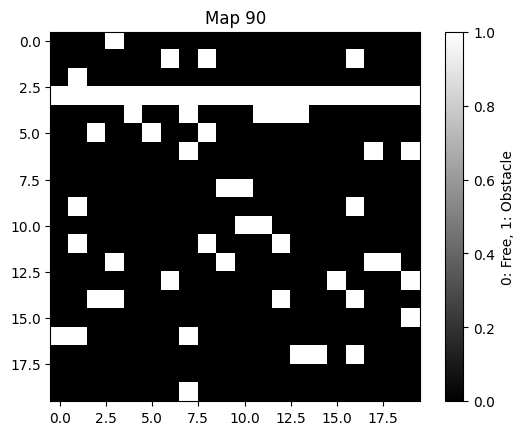

Generating map 91/100


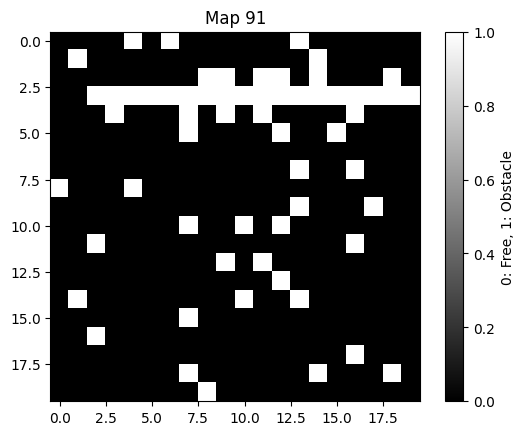

Generating map 92/100
Crash occurred at position [8. 6.]


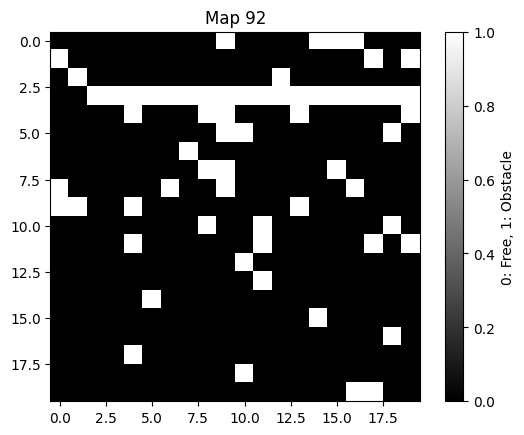

Generating map 93/100


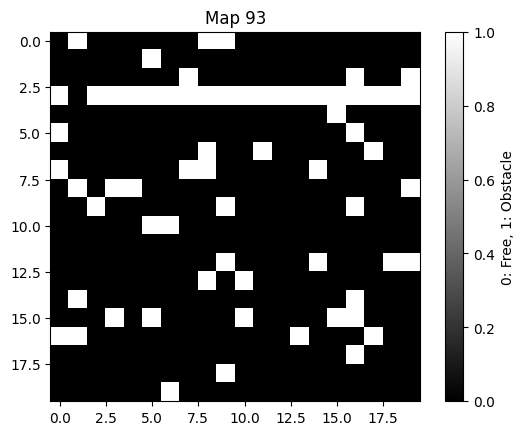

Generating map 94/100


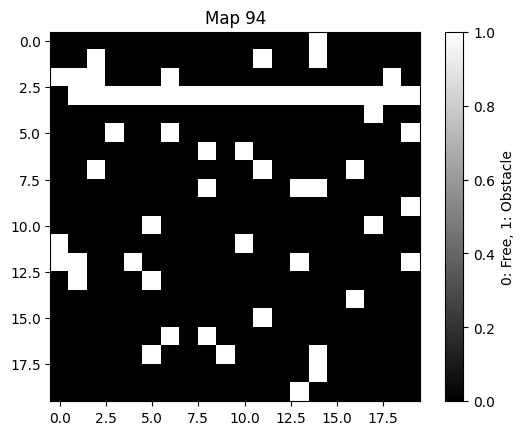

Generating map 95/100


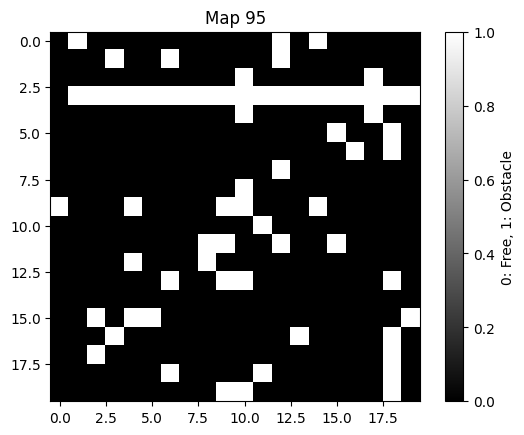

Generating map 96/100
Crash occurred at position [16. 13.]


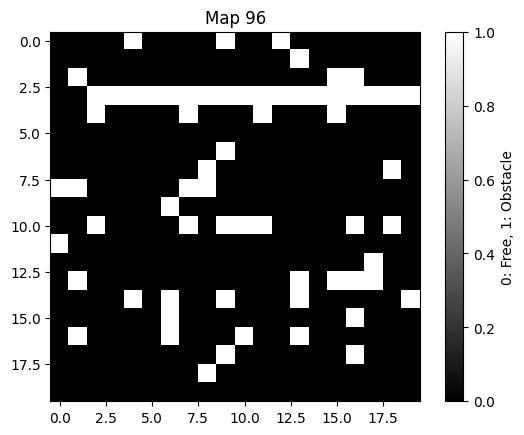

Generating map 97/100
Crash occurred at position [ 1. 13.]


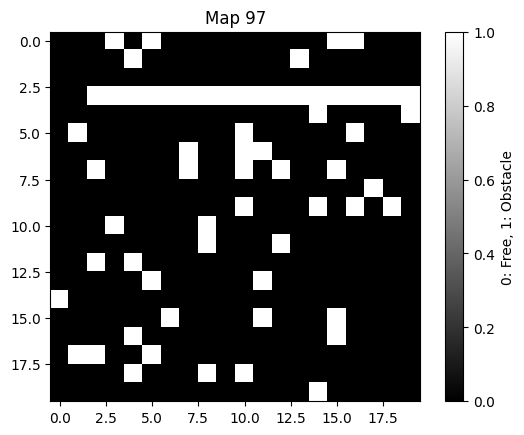

Generating map 98/100


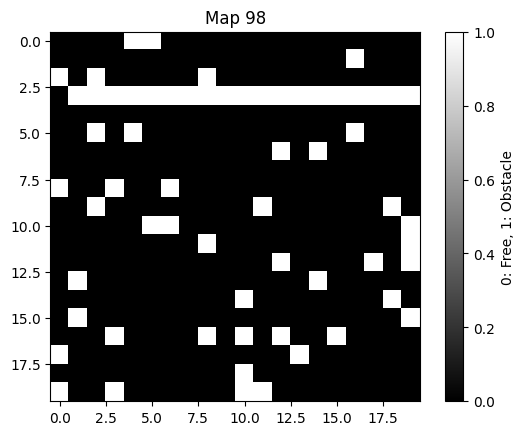

Generating map 99/100


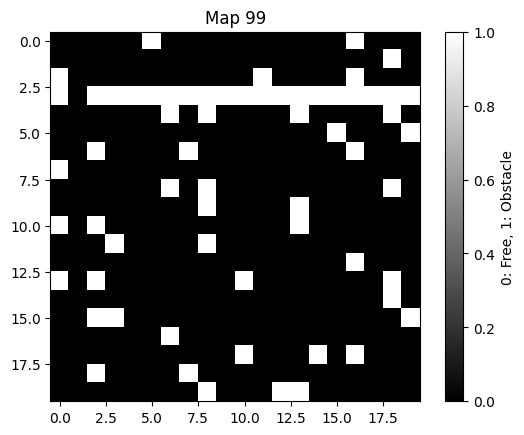

Generating map 100/100


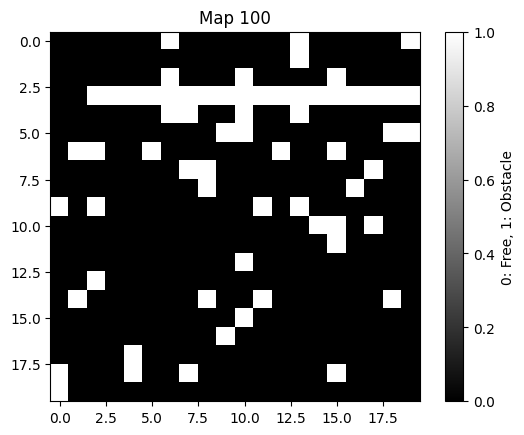

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_map(size=(20, 20), num_obstacles=30):
    """
    Create a map with obstacles.
    0: Free space
    1: Obstacle
    """
    map_grid = np.zeros(size)
    for _ in range(num_obstacles):
        x, y = np.random.randint(0, size[0]), np.random.randint(0, size[1])
        map_grid[x, y] = 1

    map_grid[3:4, 2:20] = 1
    return map_grid

def simulate_lidar_data(position, map_grid, num_points=20):
    """
    Simulate LIDAR data given the position and map grid.
    """
    lidar_data = []
    directions = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    for direction in directions:
        distance = 0
        while True:
            x = int(position[0] + distance * np.cos(direction))
            y = int(position[1] + distance * np.sin(direction))
            if x < 0 or x >= map_grid.shape[0] or y < 0 or y >= map_grid.shape[1] or map_grid[x, y] == 1:
                break
            distance += 1
        lidar_data.append(distance)
    return np.array(lidar_data)

def simulate_crash(position, map_grid):
    """
    Simulate whether a crash occurred given the current position.
    """
    return 1 if map_grid[int(position[0]), int(position[1])] == 1 else 0

def generate_path_data(map_grid, start_position, num_steps=100):
    """
    Generate LIDAR data and crash labels for a path from start_position.
    """
    position = np.array(start_position, dtype=float)
    path_data = []
    labels = []

    directions = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]])  # Right, Down, Left, Up

    for _ in range(num_steps):
        # Simulate LIDAR data
        lidar_data = simulate_lidar_data(position, map_grid)
        path_data.append(lidar_data)

        # Simulate crash
        crash = simulate_crash(position, map_grid)
        labels.append(crash)

        if crash == 1:
            print(f"Crash occurred at position {position}")
            break

        # Move to a new position
        move = directions[np.random.choice(len(directions))]
        new_position = position + move

        # Ensure the new position is within bounds and not crashing into an obstacle
        if (0 <= new_position[0] < map_grid.shape[0] and
            0 <= new_position[1] < map_grid.shape[1] and
            map_grid[int(new_position[0]), int(new_position[1])] == 0):
            position = new_position
        else:
            # If invalid move, try a different direction or stop
            continue

    return np.array(path_data), np.array(labels)

def generate_multiple_maps(num_maps=500, map_size=(20, 20), num_obstacles=50, num_steps=100):
    all_data = []
    all_labels = []

    for i in range(num_maps):
        print(f"Generating map {i+1}/{num_maps}")
        map_grid = create_map(map_size, num_obstacles)
        start_position = [np.random.randint(0, 20), np.random.randint(0, 20)]

        data, labels = generate_path_data(map_grid, start_position, num_steps)

        all_data.append(data)
        all_labels.append(labels)

        # Optionally visualize the map
        plt.imshow(map_grid, cmap='gray')
        plt.colorbar(label='0: Free, 1: Obstacle')
        plt.title(f'Map {i+1}')
        plt.show()

    # Save all data and labels
    np.save('all_path_data.npy', np.concatenate(all_data))
    np.save('all_path_labels.npy', np.concatenate(all_labels))

    return np.concatenate(all_data), np.concatenate(all_labels)

# Generate multiple maps and paths
data, labels = generate_multiple_maps(num_maps=100)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class LiquidTimeConstant(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LiquidTimeConstant, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.alpha = nn.Parameter(torch.ones(hidden_size))  # Time constant for each neuron

        # Learnable weights for input and hidden state
        self.W_in = nn.Linear(input_size, hidden_size)
        self.W_h = nn.Linear(hidden_size, hidden_size)

    def forward(self, x, h):
        # Compute the input and hidden contributions
        input_contrib = self.W_in(x)
        hidden_contrib = self.W_h(h)

        # Update hidden state with dynamics determined by time constant
        h = (1 - torch.sigmoid(self.alpha)) * h + torch.sigmoid(self.alpha) * F.relu(input_contrib + hidden_contrib)
        return h

class LiquidNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LiquidNeuralNetwork, self).__init__()
        self.hidden_size = hidden_size
        self.liquid_layer = LiquidTimeConstant(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h = torch.zeros(x.size(0), self.hidden_size).to(x.device)  # Initial hidden state
        for t in range(x.size(1)):
            h = self.liquid_layer(x[:, t, :], h)  # Update hidden state over time
        out = self.output_layer(h)  # Output based on the final hidden state
        return out

input_size = 1  # Each LIDAR point is a single value
hidden_size = 50
output_size = 1  # Output is a single value indicating crash probability

model_lnn = LiquidNeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model_lnn.parameters(), lr=0.0001)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class LiquidNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LiquidNeuralNetwork, self).__init__()
        self.liquid_layer = nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='relu')
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Initial hidden state
        out, _ = self.liquid_layer(x, h_0)
        out = self.output_layer(out[:, -1, :])  # Take the output from the last time step
        return out

input_size = 1  # Each LIDAR point is a single value
hidden_size = 50
output_size = 1  # Output is a single value indicating crash probability

model = LiquidNeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [5/1000], Loss: 0.042995873838663101196289062500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Epoch [10/1000], Loss: 0.03088019602000713348388671875000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

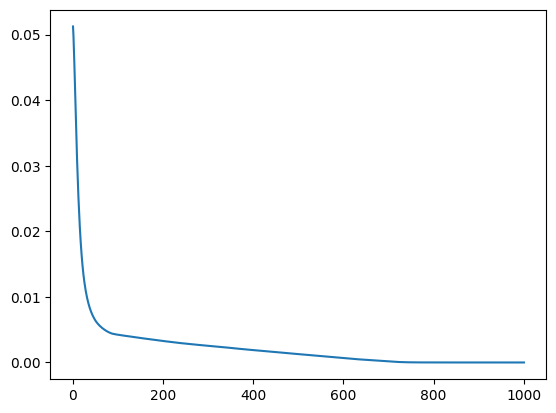

In [ ]:


data_tensor = torch.tensor(data, dtype=torch.float32).unsqueeze(-1)
labels_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(-1)

# Train the network
num_epochs = 1000
Loss = []
Steps = []

for epoch in range(num_epochs):
    model_lnn.train()
    optimizer.zero_grad()
    outputs = model_lnn(data_tensor)
    loss = criterion(outputs, labels_tensor)
    loss.backward()
    optimizer.step()
    Loss.append(float(loss.item()))
    Steps.append(epoch + 1)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.600f}')

plt.plot(Steps, Loss)
plt.show()



In [ ]:
model_lnn.eval()
with torch.no_grad():
    outputs = model_lnn(data_tensor)
    predictions = torch.sigmoid(outputs)
    accuracy = (predictions == labels_tensor).float().mean()
    print(f'Accuracy: {accuracy:.20f}')

Accuracy: 0.00000000000000000000


Step 0: Position [0. 0.], Crash Probability 0.0
Moved to [1. 0.]
Step 1: Position [1. 0.], Crash Probability 0.0
Moved to [1. 1.]
Step 2: Position [1. 1.], Crash Probability 0.0
Moved to [1. 2.]
Step 3: Position [1. 2.], Crash Probability 3.1566906323111735e-31
Moved to [1. 3.]
Step 4: Position [1. 3.], Crash Probability 5.121352410261393e-31
Moved to [1. 4.]
Step 5: Position [1. 4.], Crash Probability 8.01092441158832e-31
Moved to [2. 4.]
Step 6: Position [2. 4.], Crash Probability 2.4410247980701015e-30
Moved to [2. 5.]
Step 7: Position [2. 5.], Crash Probability 5.2405449043274274e-30
Moved to [2. 6.]
Step 8: Position [2. 6.], Crash Probability 2.3305318649798138e-29
Moved to [2. 7.]
Step 9: Position [2. 7.], Crash Probability 5.617034868116135e-29
Moved to [2. 8.]
Step 10: Position [2. 8.], Crash Probability 1.2658665671620926e-28
Moved to [2. 9.]
Step 11: Position [2. 9.], Crash Probability 3.634775565456705e-28
Moved to [ 2. 10.]
Step 12: Position [ 2. 10.], Crash Probability 9.5

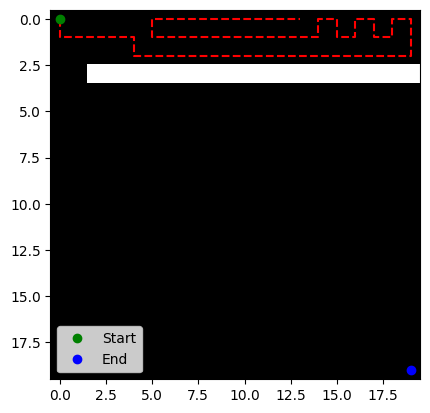

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.spatial import distance

def get_lidar_data(map_grid, position, num_points=20):
    lidar_data = []
    directions = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    for direction in directions:
        distance = 0
        while True:
            x = int(position[0] + distance * np.cos(direction))
            y = int(position[1] + distance * np.sin(direction))
            if x < 0 or x >= map_grid.shape[0] or y < 0 or y >= map_grid.shape[1] or map_grid[x, y] == 1:
                break
            distance += 1
        lidar_data.append(distance)
    return np.array(lidar_data)

def move_car(model, map_grid, start_position, end_position, num_steps=100):
    position = np.array(start_position, dtype=float)
    path = [position.copy()]
    visited = set(tuple(position))

    directions = {
        'up': np.array([-1, 0]),
        'down': np.array([1, 0]),
        'left': np.array([0, -1]),
        'right': np.array([0, 1])
    }

    for step in range(num_steps):
        if (position == end_position).all():
            print(f"Reached goal at step {step}")
            break

        lidar_data = get_lidar_data(map_grid, position)
        lidar_tensor = torch.tensor(lidar_data, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
        with torch.no_grad():
            output = model(lidar_tensor)
            crash_prob = torch.sigmoid(output).item()

        print(f"Step {step}: Position {position}, Crash Probability {crash_prob}")

        if crash_prob > 1:
            print("High crash probability, stopping.")
            break  # If crash probability is high, stop

        # Evaluate potential movements
        best_direction = None
        best_score = float('inf')
        for direction, move in directions.items():
            new_position = position + move
            new_position_tuple = tuple(new_position)
            if (0 <= new_position[0] < map_grid.shape[0] and
                0 <= new_position[1] < map_grid.shape[1] and
                map_grid[int(new_position[0]), int(new_position[1])] == 0 and
                new_position_tuple not in visited):

                # Get crash probability for the new position
                lidar_data = get_lidar_data(map_grid, new_position)
                lidar_tensor = torch.tensor(lidar_data, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
                with torch.no_grad():
                    output = model(lidar_tensor)
                    prob = torch.sigmoid(output).item()

                # Combine crash probability and distance to goal into a score
                distance_to_goal = np.linalg.norm(new_position - end_position)
                score = prob * 100 + distance_to_goal + np.random.uniform(-1, 1)  # Add randomness

                if score < best_score:
                    best_score = score
                    best_direction = move

        if best_direction is not None:
            position += best_direction
            visited.add(tuple(position))
            path.append(position.copy())
            print(f"Moved to {position}")
        else:
            print("No valid move available, stopping.")
            break  # No valid move available

    return path

# Define the map (0: free space, 1: obstacle)
map_size = (20, 20)
map_grid = np.zeros(map_size)
def create_map(size=(20, 20), num_obstacles=50):
    """
    Create a map with obstacles.
    0: Free space
    1: Obstacle
    """
    map_grid = np.zeros(size)
    for _ in range(num_obstacles):
        x, y = np.random.randint(0, size[0]), np.random.randint(0, size[1])
        #map_grid[x, y] = 1
    map_grid[3:4, 2:20] = 1
    return map_grid
map_grid_test = create_map()

# Start and end positions
start_position = [np.random.randint(0, 20), np.random.randint(0, 20)]
start_position = [0, 0]
end_position = [np.random.randint(0, 20), np.random.randint(0, 20)]
end_position = [19, 19]

# Assuming `model` is the liquid neural network already trained
path = move_car(model_lnn, map_grid_test, start_position, end_position)

# Visualize the path
path = np.array(path)
plt.imshow(map_grid_test, cmap='gray')
plt.plot(path[:, 1], path[:, 0], 'r--')  # Plot the path in red
plt.plot(start_position[1], start_position[0], 'go', label='Start')  # Start position in green
plt.plot(end_position[1], end_position[0], 'bo', label='End')  # End position in blue
plt.legend()
plt.show()

Step 0: Position [0. 0.], Crash Probability 0.9999232292175293, Loss: 7.67507663113065e-05
High crash probability, stopping.


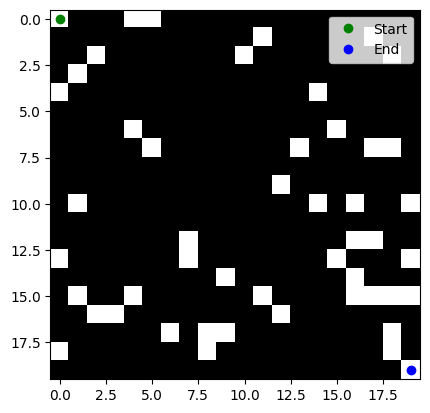

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.spatial import distance

def get_lidar_data(map_grid, position, num_points=20):
    lidar_data = []
    directions = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    for direction in directions:
        distance = 0
        while True:
            x = int(position[0] + distance * np.cos(direction))
            y = int(position[1] + distance * np.sin(direction))
            if x < 0 or x >= map_grid.shape[0] or y < 0 or y >= map_grid.shape[1] or map_grid[x, y] == 1:
                break
            distance += 1
        lidar_data.append(distance)
    return np.array(lidar_data)

import torch
import torch.nn.functional as F

def move_car(model, map_grid, start_position, end_position, num_steps=100, learning_rate=0.0001):
    position = np.array(start_position, dtype=float)
    path = [position.copy()]
    visited = set(tuple(position))

    directions = {
        'up': np.array([-1, 0]),
        'down': np.array([1, 0]),
        'left': np.array([0, -1]),
        'right': np.array([0, 1])
    }

    # Define the optimizer with a smaller learning rate for continuous learning
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for step in range(num_steps):
        if (position == end_position).all():
            print(f"Reached goal at step {step}")
            break

        lidar_data = get_lidar_data(map_grid, position)
        lidar_tensor = torch.tensor(lidar_data, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)

        # Forward pass to get crash probability
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Zero the gradients
        output = model(lidar_tensor)
        crash_prob = torch.sigmoid(output).item()

        # Calculate the loss (here we use crash_prob as the prediction)
        # Assuming labels_tensor contains the target value for training
        target = torch.tensor([1.0], dtype=torch.float32).unsqueeze(0) if crash_prob > 0.5 else torch.tensor([0.0], dtype=torch.float32).unsqueeze(0)
        loss = criterion(output, target)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        print(f"Step {step}: Position {position}, Crash Probability {crash_prob}, Loss: {loss.item()}")

        if crash_prob > 0.5:
            print("High crash probability, stopping.")
            break  # If crash probability is high, stop

        # Evaluate potential movements
        best_direction = None
        best_score = float('inf')
        for direction, move in directions.items():
            new_position = position + move
            new_position_tuple = tuple(new_position)
            if (0 <= new_position[0] < map_grid.shape[0] and
                0 <= new_position[1] < map_grid.shape[1] and
                map_grid[int(new_position[0]), int(new_position[1])] == 0 and
                new_position_tuple not in visited):

                # Get crash probability for the new position
                lidar_data = get_lidar_data(map_grid, new_position)
                lidar_tensor = torch.tensor(lidar_data, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
                with torch.no_grad():
                    output = model(lidar_tensor)
                    prob = torch.sigmoid(output).item()

                # Combine crash probability and distance to goal into a score
                distance_to_goal = np.linalg.norm(new_position - end_position)
                score = prob * 100 + distance_to_goal + np.random.uniform(-1, 1)  # Add randomness

                if score < best_score:
                    best_score = score
                    best_direction = move

        if best_direction is not None:
            position += best_direction
            visited.add(tuple(position))
            path.append(position.copy())
            print(f"Moved to {position}")
        else:
            print("No valid move available, stopping.")
            break  # No valid move available

    return path

# Define the map (0: free space, 1: obstacle)
map_size = (20, 20)
map_grid = np.zeros(map_size)
def create_map(size=(20, 20), num_obstacles=50):
    """
    Create a map with obstacles.
    0: Free space
    1: Obstacle
    """
    map_grid = np.zeros(size)
    for _ in range(num_obstacles):
        x, y = np.random.randint(0, size[0]), np.random.randint(0, size[1])
        map_grid[x, y] = 1
    #map_grid[3:4, 2:20] = 1
    return map_grid
map_grid_test = create_map()

# Start and end positions
start_position = [np.random.randint(0, 20), np.random.randint(0, 20)]
start_position = [0, 0]
end_position = [np.random.randint(0, 20), np.random.randint(0, 20)]
end_position = [19, 19]


path = move_car(model_lnn, map_grid_test, start_position, end_position)

# Visualize the path
path = np.array(path)
plt.imshow(map_grid_test, cmap='gray')
plt.plot(path[:, 1], path[:, 0], 'r--')  # Plot the path in red
plt.plot(start_position[1], start_position[0], 'go', label='Start')  # Start position in green
plt.plot(end_position[1], end_position[0], 'bo', label='End')  # End position in blue
plt.legend()

In [ ]:
import numpy as np
import torch

def evaluate_model(model, num_trials=200, map_size=(30, 30), num_obstacles=20, num_steps=100):
    successes = 0
    crashes = 0
    fails_to_reach = 0

    for trial in range(num_trials):
        # Create a random map
        map_grid = create_map(map_size, num_obstacles)

        # Randomize start and end positions
        start_position = [np.random.randint(0, map_size[0]), np.random.randint(0, map_size[1])]
        end_position = [np.random.randint(0, map_size[0]), np.random.randint(0, map_size[1])]

        # Test the model on the generated map
        path = move_car(model, map_grid, start_position, end_position, num_steps)

        # Evaluate the outcome
        if (path[-1] == end_position).all():
            successes += 1
        else:
            fails_to_reach += 1

    # Calculate success rate, crash rate, and failure rate
    success_rate = successes / num_trials
    fail_to_reach_rate = fails_to_reach / num_trials

    print(f"Evaluation over {num_trials} trials:")
    print(f"Success rate: {success_rate:.2%}")
    print(f"Failure to reach rate: {fail_to_reach_rate:.2%}")

    return success_rate, crash_rate, fail_to_reach_rate

# Run the evaluation
success_rate, crash_rate, fail_to_reach_rate = evaluate_model(model_lnn)


Streaming output truncated to the last 5000 lines.
Moved to [10. 13.]
Step 13: Position [10. 13.], Crash Probability 0.0, Loss: 0.0
Moved to [10. 12.]
Step 14: Position [10. 12.], Crash Probability 0.0, Loss: 0.0
Moved to [10. 11.]
Step 15: Position [10. 11.], Crash Probability 0.0, Loss: 0.0
Moved to [10. 10.]
Step 16: Position [10. 10.], Crash Probability 0.0, Loss: 0.0
Moved to [11. 10.]
Step 17: Position [11. 10.], Crash Probability 0.0, Loss: 0.0
Moved to [12. 10.]
Step 18: Position [12. 10.], Crash Probability 0.0, Loss: 0.0
Moved to [12.  9.]
Step 19: Position [12.  9.], Crash Probability 0.0, Loss: 0.0
Moved to [13.  9.]
Step 20: Position [13.  9.], Crash Probability 0.0, Loss: 0.0
Moved to [13.  8.]
Step 21: Position [13.  8.], Crash Probability 0.0, Loss: 0.0
Moved to [13.  7.]
Step 22: Position [13.  7.], Crash Probability 0.0, Loss: 0.0
Moved to [12.  7.]
Step 23: Position [12.  7.], Crash Probability 0.0, Loss: 0.0
Moved to [12.  6.]
Step 24: Position [12.  6.], Crash Prob